# RQ1: **What is the propensity of BO and DE optimization algorithms to end up in local optima?**

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from src.analysis.optimizers_results_schemas import (
    BayesianOptimizerResults,
    DifferentialEvolutionResults,
)
from src.analysis.analysis_utils import (
    generate_dict,
    populate_optimizer_results,
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
%matplotlib inline

In [3]:
DE_RESULTS_DIR = (
    # "/Users/aalbustami/Ali/PID-Tuning-for-Motion-Optimization/DE-results"
    "../DE-results"
)
BO_RESULTS_DIR = (
    "../BO-results"
)

assert os.path.exists(DE_RESULTS_DIR)
assert os.path.exists(BO_RESULTS_DIR)

In [4]:
CONFIGS = [f"config_{i}" for i in range(1, 4)]
TRIALS = [f"trial_{i}" for i in range(1, 2)]
INIT_FILES = ["csv", "txt"]

de_dict = generate_dict(CONFIGS, TRIALS, INIT_FILES)
bo_dict = generate_dict(CONFIGS, TRIALS, INIT_FILES)

In [5]:
de_dict = populate_optimizer_results(
    optimizer_results=DE_RESULTS_DIR, empty_dict=de_dict
)
bo_dict = populate_optimizer_results(
    optimizer_results=BO_RESULTS_DIR, empty_dict=bo_dict
)

In [6]:
de_results = DifferentialEvolutionResults(**de_dict)
bo_results = BayesianOptimizerResults(**bo_dict)

In [7]:
header = ["Optimizer", "# Trapped", "Convergence %"]

rows = [
    [
        "Bayesian Optimizer",
        bo_results.non_converging_count,
        np.round(
            (
                (bo_results.trials_count - bo_results.non_converging_count)
                / bo_results.trials_count
            )
            * 100,
            2,
        ),
    ],
    [
        "Differential Evolution",
        de_results.non_converging_count,
        np.round(
            (
                (de_results.trials_count - de_results.non_converging_count)
                / de_results.trials_count
            )
            * 100,
            2,
        ),
    ],
]

df = pd.DataFrame(rows, columns=header)
df.style.set_table_styles(
    [
        dict(selector="th", props=[("font-size", "10pt")]),
        dict(selector="td", props=[("font-size", "10pt")]),
    ]
)

,Optimizer,# Trapped,Convergence %
0,Bayesian Optimizer,4,77.780000
1,Differential Evolution,0,100.000000


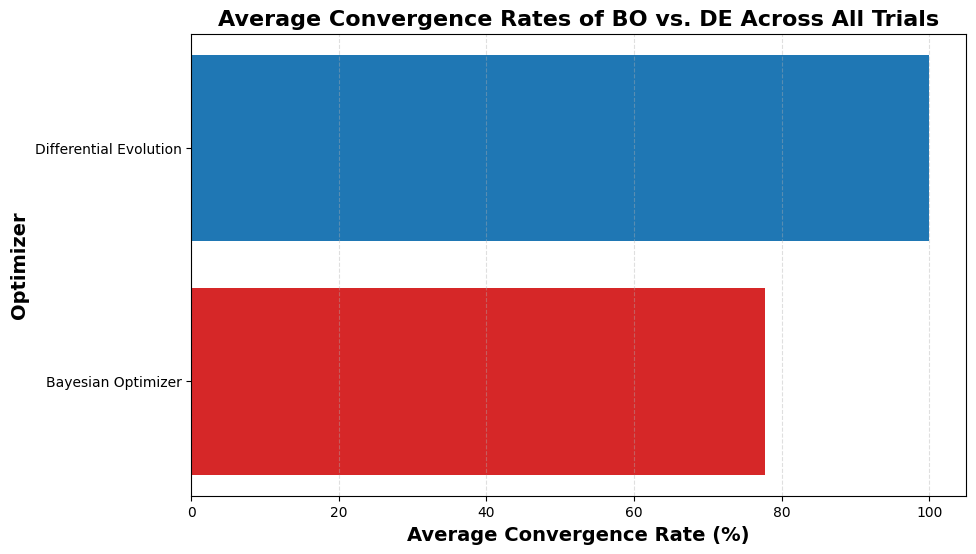

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(
    ["Bayesian Optimizer", "Differential Evolution"],
    [
        (
            (bo_results.trials_count - bo_results.non_converging_count)
            / bo_results.trials_count
        )
        * 100,
        (
            (de_results.trials_count - de_results.non_converging_count)
            / de_results.trials_count
        )
        * 100,
    ],
    color=["#d62728", "#1f77b4"],
    alpha=1.0,
)

plt.xlabel("Average Convergence Rate (%)", fontweight="bold", fontsize=14)
plt.ylabel("Optimizer", fontweight="bold", fontsize=14)
plt.title(
    "Average Convergence Rates of BO vs. DE Across All Trials",
    fontweight="bold",
    fontsize=16,
)

plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.show()